# Python versus Numpy

### Stijn Oomes
donderdag 4 februari 2021

---
 
**Python Data Science Handbook**

Chapter 2. Introduction to NumPy

https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch02.html#introduction-to-numpy

## Importeer libraries

Controleer welke version van Python in dit notebook wordt gerund.

Hint: met ! kun je commandline commando's draaien.

In [3]:
!python --version

Python 3.8.5


Importeer Numpy en OpenCV en controleer welke versie worden gerund.

In [4]:
import numpy as np
np.__version__

'1.19.2'

In [5]:
import cv2 as cv
cv.__version__

'4.5.1'

Ik check ook meteen even de versies van Scikit-Learn, TensorFlow, en Keras. Deze libraries gaan we volgende week gebruiken.

In [6]:
import sklearn as sk
sk.__version__

'0.23.2'

In [7]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [8]:
import keras as ks
ks.__version__

'2.4.3'

## Definieer een parameter

Definieer een parameter n en geef het voorlopig even een relatief kleine waarde, bijvoorbeeld 4.

We beginnen de test met een datastructuur met weinig elementen. Daarna mag je die waarde zo groot maken als je computer aan kan.

In [9]:
n = 256

## Meet hoeveel geheugen wordt gebruikt

Hoe kunnen we zien hoeveel geheugen een datastructuur inneemt?

Definieer een lijst in Python met `n` elementen met een random waarde.

Hint: `import random`

In [10]:
import random
rlist = [random.random() for a in range(1, n)]


Kijk daarna hoeveel bytes deze lijst in het geheugen inneemt.

Hint: `import sys`

In [11]:
import sys
sys.getsizeof(rlist)

2208

Kijk ook hoeveel één element van deze lijst in het geheugen inneemt.

In [12]:
sys.getsizeof(rlist[0])

24

Experimenteer eens met de grootte van andere datatypes. 

Hoeveel geheugen neemt een Boolean in? Verbaast je dat?

In [13]:
bv = True
sys.getsizeof(bv)

28

Nee een boolean blijft een object en een object heeft slaat niet alleen de waarde op (voor python).

## Meet hoe lang een berekening duurt

Hoe lang duurt het om bijvoorbeeld alle getallen in onze lijst op te tellen?

In [14]:
import time

In [15]:
%%timeit
sum(rlist)

1.17 µs ± 79.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Meet de starttijd, voer de sommatie uit, meet de eindtijd. Bepaal het verschil tusen eindtijd en begintijd. 

In welke eenheid wordt de tijd gemeten?


Hint: `import time`

In [16]:
start = time.time()
sum(rlist)
end = time.time()
print(end-start)

0.0


## Python list

Maak twee Python lists van lengte n. Vermenigvuldig die twee lists elementsgewijs. Tel vervolgens alle getallen bij elkaar op.

Bepaal hoeveel bytes de Python list in neemt.

Meet ook hoe lang deze berekeningen duren. Let op je parameter n is nu nog klein.

In [17]:
%%timeit 
array1 = np.random.randint(255,size=(n,n))
a2 = array1*array1
a2.sum()

356 µs ± 14.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## NumPy array

Maak twee NumPy arrays van lengte n. Vermenigvuldig de twee arrays elementsgewijs. Tel vervolgens alle getallen bij elkaar op.

Bepaal hoeveel bytes de NumPy array in neemt.

Meet hoe lang deze berekeningen duren. Let op je parameter n is nu nog klein.

In [18]:
%%timeit 
list1 = [random.randrange(255) for i in range(n*n)]
list2 = [a*b for a,b in zip(list1,list1)]
sum(list2)

50.4 ms ± 3.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Vergelijking Python list versus NumPy array

Kijk nu voor verschillende waardes van de parameter n hoe lang de berekeningen duren.

Bereken voor elke n de tijd voor de Python berekening gedeeld door de NumPy bereking.

Kies als verschillende n waardes bijvoorbeeld 4, 8, 16, 32, 64, 128, 256, 1024.

Een grafiek zou hier heel handig zijn!

In [19]:
'''Calculation numpy as used above'''
def doNumpyCalculation(integer):
    array1 = np.random.randint(255,size=(integer,integer))
    a2 = array1*array1
    a2.sum()
    
'''Calculation python as used above'''
def doPythonCalculation(integer):
    list1 = [random.randrange(255) for i in range(integer*integer)]
    list2 = [a*b for a,b in zip(list1,list1)]
    sum(list2)

In [20]:
'''Calculates the time it takes and'''
def timeThing(i, isNumpy):
    if(isNumpy): 
        '''Calculates the 1000 values and checks the best'''
        value = %timeit -q -o doNumpyCalculation(i)
    else:
        '''Calculates the 1000 values and checks the best'''
        value = %timeit -q -o doPythonCalculation(i)
    return value

In [21]:
valueList = [4, 8, 16, 32, 64, 128, 256, 1024]
results_numpy = []
results_python = []
'''Loops trough the values given and sets the results in the array'''
for i in valueList:
    results_numpy.append(timeThing(i, True))
    results_python.append(timeThing(i, False))

Ik wist niet precies wat ``%%timeit`` deed dus ik had het opgezocht. Dit bleek een magic magic command te zijn. Hierdoor wilde ik het ook gebruiken in een stuk code. Daarom heb ik drie functies gemaakt die time it kan gebruiken om deze berekening te doen. In de functie hieronder wordt de data gebruikt en geplot.

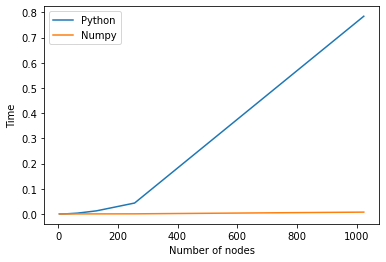

In [22]:
import matplotlib.pyplot as plt

y = valueList
'''Gets the best run of the timeit'''
x1 = [a.best for a in results_numpy]
x2 = [a.best for a in results_python]
'''Plotting lines'''
plt.plot(y,x2,label="Python")
plt.plot(y,x1,label="Numpy")

'''Name labels and sets a legenda'''
plt.xlabel('Number of nodes') 
plt.ylabel('Time') 
plt.legend() 
  
'''Laat de plot zien''' 
plt.show() 